# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [2]:
%cd /..
%cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

/
/content/gdrive/MyDrive/hanon_1st


In [3]:
# 변수 불러오기
with open("Heat_Exchanger_pp.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [4]:
# SVR 불러오기
from sklearn.svm import SVR

In [5]:
# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

In [6]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
svm_model = SVR(kernel='linear')
#svm_model = SVR(kernel='rbf')
# Default parameters for SVR
# svm_model = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svm_model.fit(X_scaled_train, Y_scaled_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

## Ch 1-2. 모델 평가

In [7]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

In [8]:
# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.0038785302954812773
R-squared_train: 0.9960693483000913
MSE_test: 0.003947372389024693
R-squared_test: 0.9961166740453817


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


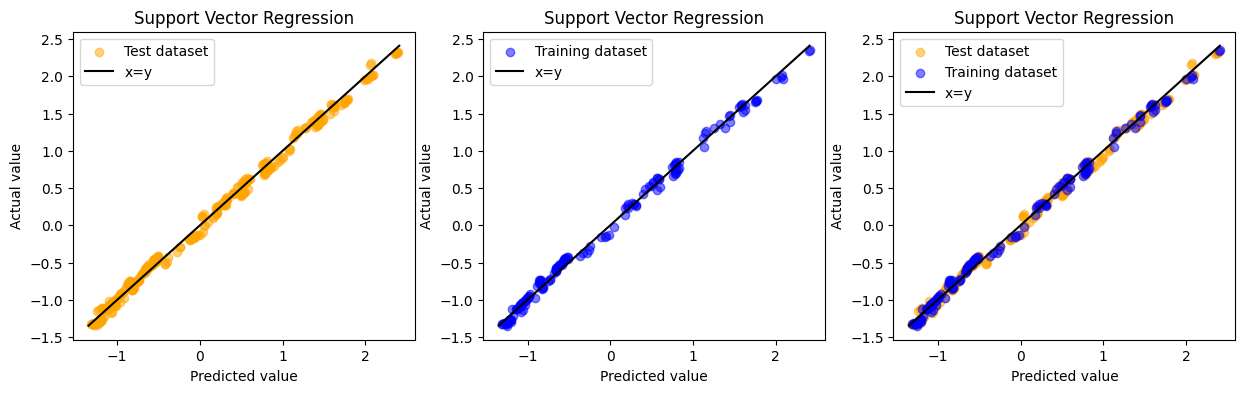

In [9]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5)
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]

rfr_model.fit(X_scaled_train, Y_scaled_train)

<ipython-input-11-43e1d9081950>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_scaled_train, Y_scaled_train)


RandomForestRegressor(n_estimators=5)

## Ch 2-2. 모델 평가

In [12]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

In [13]:
# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.00020969106126759866
R-squared_train: 0.9997874910175673
MSE_test: 0.0004855889336213232
R-squared_test: 0.9995222897858712


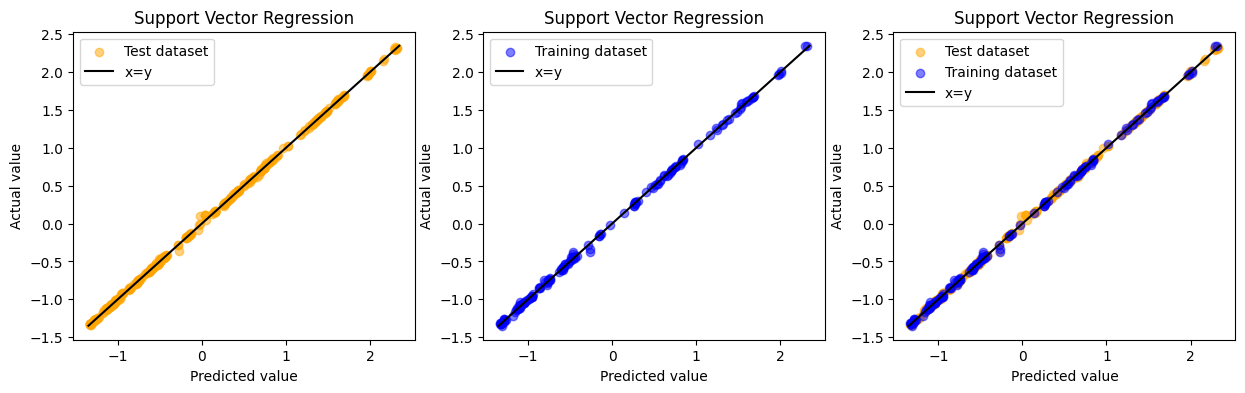

In [14]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 2-3. 결정트리 시각화

In [15]:
# 결정트리 시각화
import graphviz
from sklearn import tree

In [16]:
# 개별 트리 시각화
for i, estimator in enumerate(rfr_model.estimators_):
    dot_data = tree.export_graphviz(estimator, out_file=None,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.view(filename=f"tree2_{i+1}")

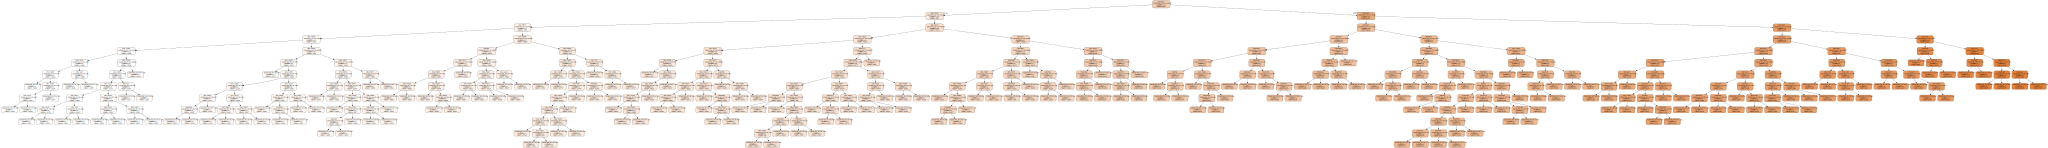

In [17]:
display(graphviz.Source(dot_data))

# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [18]:
import tensorflow as tf

In [19]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 5s 4ms/step - loss: 0.5131
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 11/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 12/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/50
12/12 [==============================

## Ch 3-2. 모델 평가

In [20]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

5/5 [==============================] - 0s 4ms/step


In [21]:
# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.00042080894421273697
R-squared_train: 0.9995735360391967
MSE_test: 0.0008113860379584919
R-squared_test: 0.9992017787657481


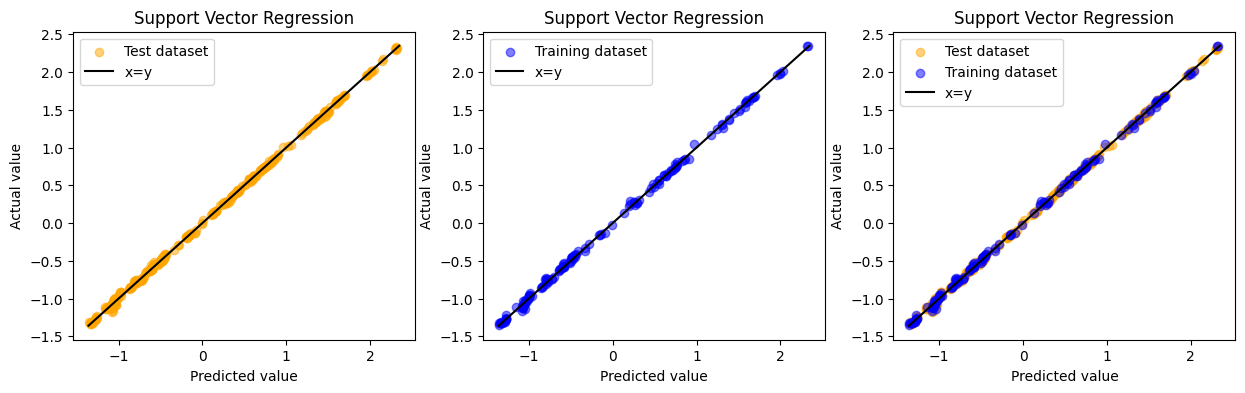

In [22]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

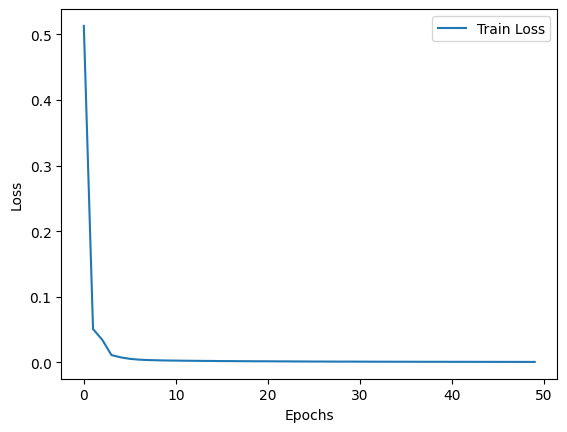

In [23]:
# 손실 그래프
plt.plot(hist.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()